In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib.patheffects as pe


In [3]:
from Ubermensch.utils import *

In [50]:
altitude_cr = 11887.2 # m, 39000 ft, From REQ-CRUISE-01
_, _, rho_cr = isa(altitude_cr)
isa(altitude_cr)

(216.6, 19648.295168950015, 0.31607090848028313)

In [4]:
isa(0)

(288.15, 101325.0, 1.2252256827617731)

In [4]:
max_LD = 1/2 * SQRT(PI * aspect_ratio * oswald_eff_cruise / c_d0_cruise)
max_LD

19.291144549535932

In [5]:
oswald_eff_cruise, c_d0_cruise

(0.7984604933501173, 0.01584)

In [6]:
V_cr

241.90678227780217

In [7]:
jet_efficiency, max_LD

(0.3960562839529633, 19.291144549535932)

In [8]:
m_max_pl = 49442 # kg

R_des = 13797     # km
m_pl_des = 27669  # kg

R_ferry_req = 15811 # km 

m_oe_to_mto = 0.4841  # linear reg from ref aircraft

In [9]:
r_lost = 1/0.7 * max_LD * (altitude_cr + V_cr**2/(2 * 9.81)) / 1000

In [10]:
r_lost

409.7939083615357

In [11]:
r_div = 250  # km

In [12]:
def r_eq(range):
    te = 2700   # loiter time, s
    fcon = 0.05
    return V_cr * te/1000 + 1.2 * r_div + (1+ fcon) * (range + r_lost)

In [13]:
r_eq_des = r_eq(R_des)
r_eq_des

15870.28191592968

In [14]:
def fuel_mass_fr(r_eq):
    return 1 - np.exp(-r_eq * 1000 / (jet_efficiency * (43 * 1e6 / 9.81) * max_LD))

In [15]:
beta_f_des = fuel_mass_fr(r_eq_des)
beta_f_des

0.3774193395859158

In [16]:
261+15

276

In [17]:
added = (261+15)/beta_f_des
added

731.282080835636

In [18]:
m_mto_des = m_pl_des / (1 - m_oe_to_mto - beta_f_des) + added
m_mto_des

200535.35520746777

In [19]:
m_oe_des = m_oe_to_mto * (m_mto_des - added)
m_oe_des

96725.15180060262

In [20]:
m_f_des = beta_f_des * m_mto_des 
m_f_des

75685.92132602952

In [21]:
r_aux = r_eq_des - R_des
r_aux

2073.2819159296796

In [22]:
m_f_max_pl = m_mto_des - m_oe_des - m_max_pl
m_f_max_pl

54368.203406865156

In [23]:
def range(m_oe, m_pl, m_f, r_aux):
    return 1/1000 * jet_efficiency * max_LD * (43 * 1e6 / 9.81) * np.log((m_oe + m_pl + m_f)/(m_oe + m_pl)) - r_aux

In [24]:
r_max_pl = range(m_oe_des, m_max_pl, m_f_max_pl, r_aux)
r_max_pl

8517.567042028426

In [25]:
r_ferry = range(m_oe_des, 0, m_f_des, r_aux)
r_ferry

17284.17440107648

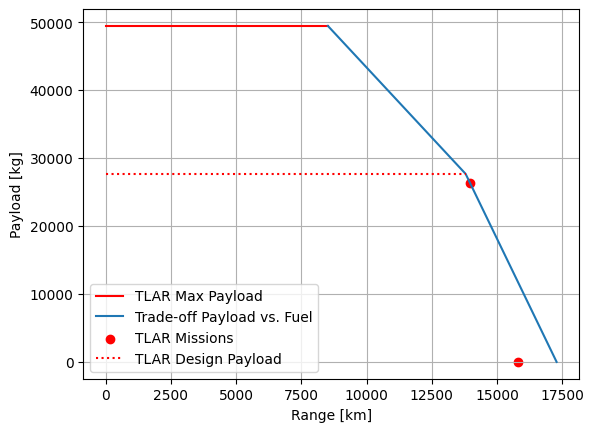

In [46]:
plt.plot([0, r_max_pl], [m_max_pl, m_max_pl], color="red", label="TLAR Max Payload")
plt.plot([r_max_pl, R_des, r_ferry], [m_max_pl, m_pl_des, 0], label="Trade-off Payload vs. Fuel")
plt.scatter([13983, 15811], [26308, 0], color="red", label="TLAR Missions")
plt.hlines([m_pl_des], [0], [R_des], linestyles="dotted", label="TLAR Design Payload", color="red")
plt.grid()
# plt.title("Payload-range Diagram")
plt.xlabel("Range [km]")
plt.legend()
plt.ylabel("Payload [kg]")
plt.savefig("payload-range.svg", format="svg")
plt.show()

In [27]:
range(m_oe_des, 26308, m_f_des, r_aux)

13983.076949445127

In [1]:
approach_speed = np.array([70, 75, 80]) # m/s 
#approach_speed = np.array([68.5]) # m/s 
v_stall = approach_speed / 1.23

rho = isa(0, T_offset=15)[2]
print(rho)

q_stall = 1/2 * rho * v_stall**2
q_stall


NameError: name 'np' is not defined

cl_max_landing 3.128376443734799
min_s 7857.128737010655
!!!WS 9510.52565228623
cl_max_landing 2.7251634798756474
min_s 7857.128737010654
!!!WS 8284.724568213784
cl_max_landing 2.395163214734455
min_s 7857.128737010654
!!!WS 7281.496202531643


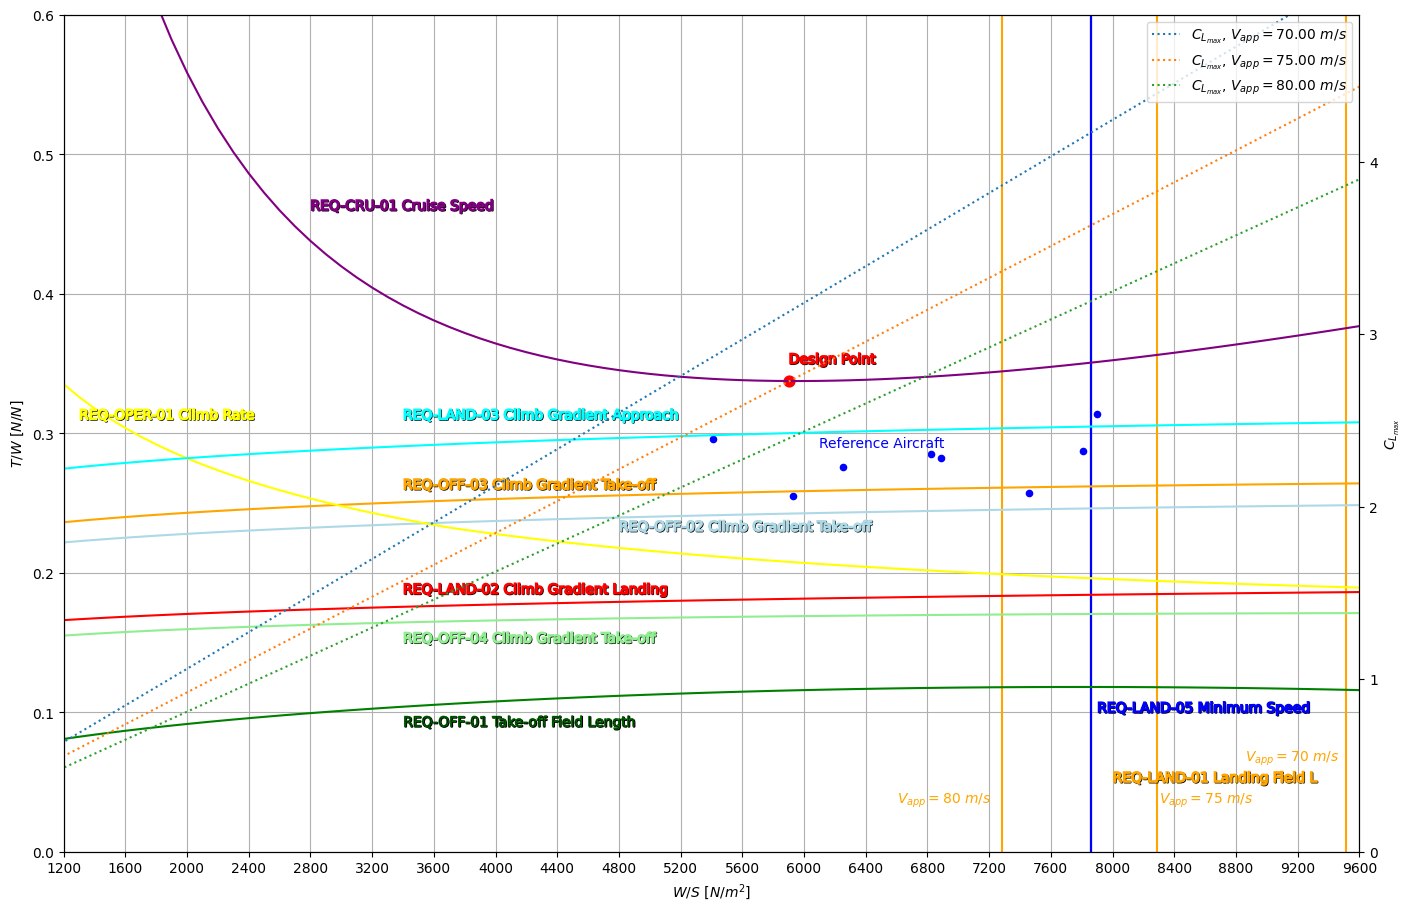

In [38]:
W_S = np.arange(0, 10000, step=100)

W_S_takeoff_field = takeoff_field(W_S[4:], h_takeoff=0, oei_condition=True, cl_max_takeoff=0.2) # This is not critical! 

W_S_cruise_speed = cruise_speed(W_S[4:])  # First few elements are divide by 0 so skip them 
W_S_climb_rate = climb_rate(W_S[4:])

W_S_climb_gradient_25_119  = climb_gradient(W_S, altitude_climb_rate=0, zero_lift_drag_coeff=c_d0(gear_extended=True, flap_deflection=flap_deflection_landing), oswald_factor=oswald_eff(flap_deflection_landing), climb_grad_percent=3.2, oei_condition=False) 
W_S_climb_gradient_25_121a = climb_gradient(W_S, altitude_climb_rate=0, zero_lift_drag_coeff=c_d0(gear_extended=True, flap_deflection=flap_deflection_takeoff), oswald_factor=oswald_eff(flap_deflection_takeoff), climb_grad_percent=0, oei_condition=True) 
W_S_climb_gradient_25_121b = climb_gradient(W_S, altitude_climb_rate=0, zero_lift_drag_coeff=c_d0(gear_extended=False, flap_deflection=flap_deflection_takeoff), oswald_factor=oswald_eff(flap_deflection_takeoff), climb_grad_percent=2.4, oei_condition=True)
W_S_climb_gradient_25_121c = climb_gradient(W_S, altitude_climb_rate=0, zero_lift_drag_coeff=c_d0_cruise, oswald_factor=oswald_eff_cruise, climb_grad_percent=1.2, oei_condition=True)
W_S_climb_gradient_25_121d = climb_gradient(W_S, altitude_climb_rate=0, zero_lift_drag_coeff=c_d0(gear_extended=False, flap_deflection=flap_deflection_landing), oswald_factor=oswald_eff(flap_deflection_landing), climb_grad_percent=2.1, oei_condition=True)

# Get our reference aircraft database to plot them
sheets_url = "https://docs.google.com/spreadsheets/d/1HbuwOGN-pKfY95QqNByAydbRJVicJ3oztc3d0fufQT8/export?format=csv&gid=0#gid=0"

df = pd.read_csv(sheets_url, header=[0,1], nrows=8)

fig, ax = plt.subplots(figsize=(14, 9), layout='constrained')
ax2 = ax.twinx()

for i, q in enumerate(q_stall):
    c_l_max_landing = 1/q * 5900

    print("cl_max_landing", c_l_max_landing)
    W_S_min_speed = min_speed(cl_max_landing=c_l_max_landing, approach_speed=approach_speed[i])
    print("min_s", W_S_min_speed)

    W_S_landing_field_length = landing_field(h_landing=0, cl_max_landing=c_l_max_landing)
    print("!!!WS", W_S_landing_field_length)

    ax.vlines([W_S_landing_field_length], ymin=0, ymax=1, color="orange")
    ax.vlines([W_S_min_speed], ymin=0, ymax=1, color="b")

    c_l_max = 1/q * W_S
    ax2.plot(W_S, c_l_max, label=f"$C_{{L_{{max}}}}$, $V_{{app}} = {approach_speed[i]:.2f}\ m/s$", linestyle="dotted")


ax.text(7900, 0.1, "REQ-LAND-05 Minimum Speed", color="blue", path_effects=[pe.PathPatchEffect(offset=(0.5, -0.5), hatch='xxxx', facecolor='gray'), pe.PathPatchEffect(edgecolor='blue', linewidth=1.1, facecolor='black')])
ax.text(8000, 0.05, "REQ-LAND-01 Landing Field L", color="orange", path_effects=[pe.PathPatchEffect(offset=(0.5, -0.5), hatch='xxxx', facecolor='gray'), pe.PathPatchEffect(edgecolor='orange', linewidth=1.1, facecolor='black')])
ax.text(9200-340, 0.065, "$V_{app} = 70\ m/s$", color="orange")
ax.text(8300, 0.035, "$V_{app} = 75\ m/s$", color="orange")
ax.text(6800-200, 0.035, "$V_{app} = 80\ m/s$", color="orange")

ax.plot(W_S[4:], W_S_takeoff_field, label="", color="green")
ax.text(3400, 0.09, "REQ-OFF-01 Take-off Field Length", color="green", path_effects=[pe.PathPatchEffect(offset=(0.5, -0.5), hatch='xxxx', facecolor='gray'), pe.PathPatchEffect(edgecolor='green', linewidth=0.5, facecolor='black')])

ax.plot(W_S, W_S_climb_gradient_25_121a, label="", color="lightblue")
ax.text(4800, 0.23, "REQ-OFF-02 Climb Gradient Take-off", color="lightblue", path_effects=[pe.PathPatchEffect(offset=(0.5, -0.5), hatch='xxxx', facecolor='gray'), pe.PathPatchEffect(edgecolor='lightblue', linewidth=1.1, facecolor='black')])
ax.plot(W_S, W_S_climb_gradient_25_121b, label="", color="orange")
ax.text(3400, 0.26, "REQ-OFF-03 Climb Gradient Take-off", color="orange", path_effects=[pe.PathPatchEffect(offset=(0.5, -0.5), hatch='xxxx', facecolor='gray'), pe.PathPatchEffect(edgecolor='orange', linewidth=1.1, facecolor='black')])
ax.plot(W_S, W_S_climb_gradient_25_121c, label="", color="lightgreen")
ax.text(3400, 0.15, "REQ-OFF-04 Climb Gradient Take-off", color="lightgreen", path_effects=[pe.PathPatchEffect(offset=(0.5, -0.5), hatch='xxxx', facecolor='gray'), pe.PathPatchEffect(edgecolor='lightgreen', linewidth=1.1, facecolor='black')])

ax.plot(W_S[4:], W_S_climb_rate, color="yellow")
ax.text(1300, 0.31, "REQ-OPER-01 Climb Rate", color="yellow", path_effects=[pe.PathPatchEffect(offset=(0.5, -0.5), hatch='xxxx', facecolor='gray'), pe.PathPatchEffect(edgecolor='yellow', linewidth=1.1, facecolor='black')])

ax.plot(W_S[4:], W_S_cruise_speed, color="purple")
ax.text(2800, 0.46, "REQ-CRU-01 Cruise Speed", color="purple", path_effects=[pe.PathPatchEffect(offset=(0.5, -0.5), hatch='xxxx', facecolor='gray'), pe.PathPatchEffect(edgecolor='purple', linewidth=1.1, facecolor='black')])

ax.plot(W_S, W_S_climb_gradient_25_119, color="red")
ax.text(3400, 0.185, "REQ-LAND-02 Climb Gradient Landing", color="red", path_effects=[pe.PathPatchEffect(offset=(0.5, -0.5), hatch='xxxx', facecolor='gray'), pe.PathPatchEffect(edgecolor='red', linewidth=1.1, facecolor='black')])

ax.plot(W_S, W_S_climb_gradient_25_121d, color="cyan")
ax.text(3400, 0.31, "REQ-LAND-03 Climb Gradient Approach", color="cyan", path_effects=[pe.PathPatchEffect(offset=(0.5, -0.5), hatch='xxxx', facecolor='gray'), pe.PathPatchEffect(edgecolor='cyan', linewidth=1.1, facecolor='black')])

ax.scatter(df["W/S"].values, df["T_TO/W_TO"].values, c="blue", s=20)
ax.scatter([5900], [0.3375040290118509], c="red", s=60)
ax.text(5900, 0.35, "Design Point", color="red", path_effects=[pe.PathPatchEffect(offset=(0.5, -0.5), hatch='xxxx', facecolor='gray'), pe.PathPatchEffect(edgecolor='red', linewidth=1.1, facecolor='black')])
ax.text(6100, 0.29, "Reference Aircraft", color="blue")

ax.set_ylim((0, 0.6))
ax.set_ylabel("$T/W\ [N/N]$")
ax2.set_ylabel("$C_{L_{max}}$")
ax.set_xlabel("$W/S\ [N/m^2]$")
plt.xlim(1200, 9600)
ax2.set_ylim((0, 4.85))

ax.xaxis.set_major_locator(plticker.MultipleLocator(400)) 
ax.yaxis.set_major_locator(plticker.MultipleLocator(0.1)) 

ax.grid()
ax2.legend(loc=1)

plt.savefig('matching_diagram.svg', format='svg')
plt.show()

(0.3375040290118509, 55)

In [2]:
W_S_cruise_speed[55]

NameError: name 'W_S_cruise_speed' is not defined

In [56]:
cruise_speed(5900)

0.3375040290118509

In [61]:
W = m_mto_des * 9.81

In [62]:
S = m_mto_des * 9.81 / 5900
S

333.4325143364846

In [63]:
T = m_mto_des * 9.81 * 0.3375
T

663947.4941725249

In [59]:
sweep_angle = angle_of_quarter_chord_line(0.82)
V_eff = V_cr * np.cos(sweep_angle)
V_cr, V_eff

(241.90678227780217, 212.58474806231098)

In [66]:
q = 0.5 * rho_cr * V_cr **2

q_eff = 0.5 * rho_cr * V_eff **2
q_eff

7141.981724951413

In [77]:
T_cruise

216.6

In [82]:
speed_of_sound(T_cruise)

295.0082710704905

In [79]:
V_cr

241.90678227780217

In [76]:
rho_cr

0.31607090848028313

(9248.05957012139, 7141.981724951413)

In [73]:
C_L_des = 1.1 * 1/q * 1/2 * (5900 * 0.95 + 5900 * 0.79)
C_L_des

0.6105388873404377

In [75]:
C_L_des * q/q_eff

0.7905788921685336

In [33]:
W_S[55+4]

5900

In [ ]:
0.00535

In [ ]:
0.00585

In [34]:
W_S_landing_field_length

7281.496202531643

In [35]:
cruise_speed(5472.150325258757)

0.3386726983592588

In [36]:
0.3358929715164873 * m_mto_des * 9.81 

660786.0644401037

In [37]:
599 518

SyntaxError: invalid syntax (1145264204.py, line 1)

In [28]:
649504 / 2

324752.0

In [131]:
weight_takeoff/5900

333.31864238601696